# Global Saliency Map

This notebook is dedicated to the visualization of global participants' saliency maps in the scenes. By overlaying the saliency maps on the actual images, we aim to gain a clearer understanding of how participants' attention is distributed across different areas of each scene.

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import sys

sys.path.append("../")

import os
import cv2
from tqdm import tqdm
from pathlib import Path
from justpfm import justpfm
import matplotlib.pyplot as plt

from src.utils.file import get_files_recursive, get_ids_from_file_path, get_set_str
from src.config import IMAGES_PATH, SALIENCY_MAP_PFM_PATH, SALIENCY_MAP_VIZ_PATH

In [18]:
if not os.path.exists(SALIENCY_MAP_PFM_PATH):
    print(f"❌ {Path(SALIENCY_MAP_PFM_PATH).resolve()} does not exist. Please run the global saliency computation script first.")
else:
    print(f"✅ You are good to go!")

✅ You are good to go!


## Single Sequence Visualization

In [19]:
def plot_saliency_visualization(experiment_id: int, set_id: int, sequence_id: int) -> None:
    """
    Plot saliency visualization for a given experiment, set and sequence.

    Args:
        experiment_id (int): The experiment ID.
        set_id (int): The set ID.
        sequence_id (int): The sequence ID.
    """
    set_str = get_set_str(experiment_id, set_id)
    # Get image and saliency map
    image_file_path = f"{IMAGES_PATH}/experiment{experiment_id}/{set_str}/scene{sequence_id}.png"
    image = cv2.imread(image_file_path)
    saliency_map_file_path = f"{SALIENCY_MAP_PFM_PATH}/experiment{experiment_id}/{set_str}/scene{sequence_id}.pfm"
    saliency_map = justpfm.read_pfm(saliency_map_file_path)
    saliency_map = cv2.normalize(saliency_map, None, 0, 1, cv2.NORM_MINMAX)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 3))
    plt.imshow(image)
    plt.imshow(saliency_map, alpha=0.5, cmap="inferno")
    plt.axis("off")
    plt.colorbar(label="Saliency")
    plt.title(f"Saliency Visualization for Experiment {experiment_id} Set {set_id} Sequence {sequence_id}")
    plt.tight_layout()
    plt.show()


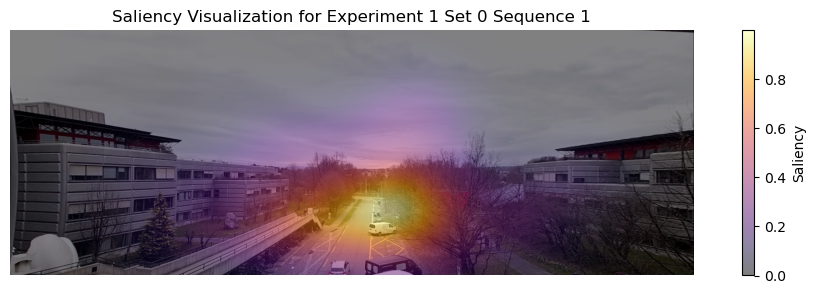

In [20]:
plot_saliency_visualization(
    experiment_id=1,
    set_id=0,
    sequence_id=1
)

## Saving All Sequence Visualizations

In [21]:
def save_saliency_visualizations() -> None:
    """
    Save saliency visualizations for all experiments, sets and sequences.
    """
    image_file_paths = get_files_recursive(IMAGES_PATH, "*.png")
    image_file_paths = sorted(image_file_paths)
    saliency_file_paths = get_files_recursive(SALIENCY_MAP_PFM_PATH, "*.pfm")
    saliency_file_paths = sorted(saliency_file_paths)

    for image_file_path, saliency_file_path in tqdm(zip(image_file_paths, saliency_file_paths), total=len(image_file_paths), desc="⌛ Saving saliency visualizations..."):
        # Get image and saliency map
        image = cv2.imread(image_file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        saliency = justpfm.read_pfm(saliency_file_path)
        saliency = cv2.normalize(saliency, None, 0, 1, cv2.NORM_MINMAX)

        # Get visualization file path
        experiment_id, set_id, sequence_id = get_ids_from_file_path(image_file_path)
        set_str = get_set_str(experiment_id, set_id)
        visualization_file_path = f"{SALIENCY_MAP_VIZ_PATH}/experiment{experiment_id}/{set_str}/scene{sequence_id}.png"

        # Plot and save saliency visualization
        os.makedirs(os.path.dirname(visualization_file_path), exist_ok=True)
        plt.figure(figsize=(10, 3))
        plt.imshow(image)
        plt.imshow(saliency, alpha=0.5, cmap="inferno")
        plt.axis("off")
        plt.colorbar(label="Saliency")
        plt.title(f"Saliency Visualization for Experiment {experiment_id} Set {set_id} Sequence {sequence_id}")
        plt.tight_layout()
        plt.savefig(visualization_file_path)
        plt.close()

    print(f"✅ Saliency visualizations saved to {Path(SALIENCY_MAP_VIZ_PATH).resolve()}")

In [22]:
save_saliency_visualizations()

⌛ Saving saliency visualizations...: 100%|██████████| 50/50 [00:17<00:00,  2.91it/s]

✅ Saliency visualizations saved to C:\Users\arnau\cours\master_project\git\generated\saliency\viz
